In [1]:
import os
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pop_tools
import cmocean.cm as cmo

import matplotlib.ticker as ticker

In [2]:
grid_name = 'POP_gx1v7'

region_defs = {
    'LabradorSea': [
        {'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}        
    ]}
mask_lab_sea = pop_tools.region_mask_3d(grid_name, 
                                  region_defs=region_defs, 
                                  mask_name='Labrador Sea')
mask_lab_sea = mask_lab_sea.sum('region')  


region_defs = {
    'SubpolarAtlantic':[
        {'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [45.0, 66.0], 'TLONG': [260.0, 360.0]}}   
    ],
    'LabradorSea': [
        {'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}        
    ]}
mask_spg = pop_tools.region_mask_3d(grid_name, region_defs=region_defs, mask_name='Subpolar Gyre')
mask_spg = mask_spg.sum('region')  

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
# sMOC at 55°N
ds_sMOC = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/sMOCcomposite.nc')
# stupid indexing nlat=(slice(250,365)); 
ds_smoc_55N = ds_sMOC.densMOC.isel(nlat=340-250).max('sigma')
delta_smoc_55N = ((ds_smoc_55N - ds_smoc_55N.isel(time=slice(0,40)).mean('time'))/(ds_smoc_55N.isel(time=slice(0,40)).mean('time'))).values

# dMOC at 55°N
da_dMOC = xr.open_dataarray('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/dMOCcomposite-test.nc')
ds_dmoc_55N = da_dMOC.isel(nlat=340).max('z_t')
delta_dmoc_55N = ((ds_dmoc_55N - ds_dmoc_55N.isel(time=slice(0,40)).mean('time'))/(ds_smoc_55N.isel(time=slice(0,40)).mean('time'))).values

# BSF
ds_bsf = xr.open_dataarray('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/BSFcomposite-test.nc').roll(nlon=+100).where(mask_spg == 1)
ds_bsf_min_spg = ds_bsf.min(dim=('nlat', 'nlon'))
delta_bsf_min = ((ds_bsf_min_spg  - ds_bsf_min_spg.isel(time=slice(0,40)).mean('time'))/(ds_bsf_min_spg.isel(time=slice(0,40)).mean('time'))).values

In [4]:
# Windstress in Labrador Sea Annual
ds_taux_ann = xr.open_dataset(os.path.expanduser('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUXcomposite_annual.nc'))
ds_taux_ann = ds_taux_ann.where(mask_lab_sea == 1)
ds_tauy_ann = xr.open_dataset(os.path.expanduser('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUYcomposite_annual.nc'))
ds_tauy_ann = ds_tauy_ann.where(mask_lab_sea == 1)
ds_tau_ann = (ds_taux_ann.TAUX**2 + ds_tauy_ann.TAUY**2)**0.5
ds_tau_ann = ds_tau_ann.mean(dim=('nlat', 'nlon'))
delta_tau_lab_annual = ((ds_tau_ann - ds_tau_ann.isel(time=slice(0,40)).mean('time'))/(ds_tau_ann.isel(time=slice(0,40)).mean('time'))).values

# Windstress in Labrador Sea in March
ds_taux_mar = xr.open_dataset(os.path.expanduser('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUXcomposite_march.nc'))
ds_taux_mar = ds_taux_mar.where(mask_lab_sea == 1)
ds_tauy_mar = xr.open_dataset(os.path.expanduser('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/TAUYcomposite_march.nc'))
ds_tauy_mar = ds_tauy_mar.where(mask_lab_sea == 1)
ds_tau_mar = (ds_taux_mar.TAUX**2 + ds_tauy_mar.TAUY**2)**0.5
ds_tau_mar = ds_tau_mar.mean(dim=('nlat', 'nlon'))
delta_tau_lab_march = ((ds_tau_mar - ds_tau_mar.isel(time=slice(0,40)).mean('time'))/(ds_tau_mar.isel(time=slice(0,40)).mean('time'))).values

In [5]:
ds_shf = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/SHFcomposite.nc').roll(nlon=+100).where(mask_lab_sea == 1)
ds_shf_lab = ds_shf.SHF.mean(dim=('nlat', 'nlon'))
delta_shf_lab_mean = ((ds_shf_lab - ds_shf_lab.isel(time=slice(0,40)).mean('time'))/(ds_shf_lab.isel(time=slice(0,40)).mean('time'))).values

In [6]:
## MOC at 55°N
# sMOC
ds_sMOC = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/sMOCcomposite.nc')
# stupid indexing nlat=(slice(250,365)); 
ds_smoc_55N = ds_sMOC.densMOC.isel(nlat=340-250).max('sigma')
delta_smoc_55N = ((ds_smoc_55N - ds_smoc_55N.isel(time=slice(0,40)).mean('time'))/(ds_smoc_55N.isel(time=slice(0,40)).mean('time'))).values

# dMOC
da_dMOC = xr.open_dataarray('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/dMOCcomposite.nc')
ds_dmoc_55N = da_dMOC.isel(nlat=340).max('z_t')
delta_dmoc_55N = ((ds_dmoc_55N - ds_dmoc_55N.isel(time=slice(0,40)).mean('time'))/(ds_smoc_55N.isel(time=slice(0,40)).mean('time'))).values

## MOC at 45°N
# sMOC
ds_smoc_45N = ds_sMOC.densMOC.isel(nlat=315-250).max('sigma')
delta_smoc_45N = ((ds_smoc_45N - ds_smoc_45N.isel(time=slice(0,40)).mean('time'))/(ds_smoc_45N.isel(time=slice(0,40)).mean('time'))).values
# dMOC
ds_dmoc_45N = da_dMOC.isel(nlat=315).max('z_t')
delta_dmoc_45N = ((ds_dmoc_45N - ds_dmoc_45N.isel(time=slice(0,40)).mean('time'))/(ds_smoc_45N.isel(time=slice(0,40)).mean('time'))).values

## MOC at 26°N
# sMOC
ds_smoc_26N = ds_sMOC.densMOC.isel(nlat=270-250).max('sigma')
delta_smoc_26N = ((ds_smoc_26N - ds_smoc_26N.isel(time=slice(0,40)).mean('time'))/(ds_smoc_26N.isel(time=slice(0,40)).mean('time'))).values
# dMOC
ds_dmoc_26N = da_dMOC.isel(nlat=270).max('z_t')
delta_dmoc_26N = ((ds_dmoc_26N - ds_dmoc_26N.isel(time=slice(0,40)).mean('time'))/(ds_smoc_26N.isel(time=slice(0,40)).mean('time'))).values

## NAO
# mean annual signal
#nao_annual = np.load(os.path.expanduser('~/phase1_CONDA/timeseries/nao_mean.npy'))
#mean DJF signal
#nao_DJF = np.load(os.path.expanduser('~/phase1_CONDA/timeseries//DJF_nao_mean.npy'))

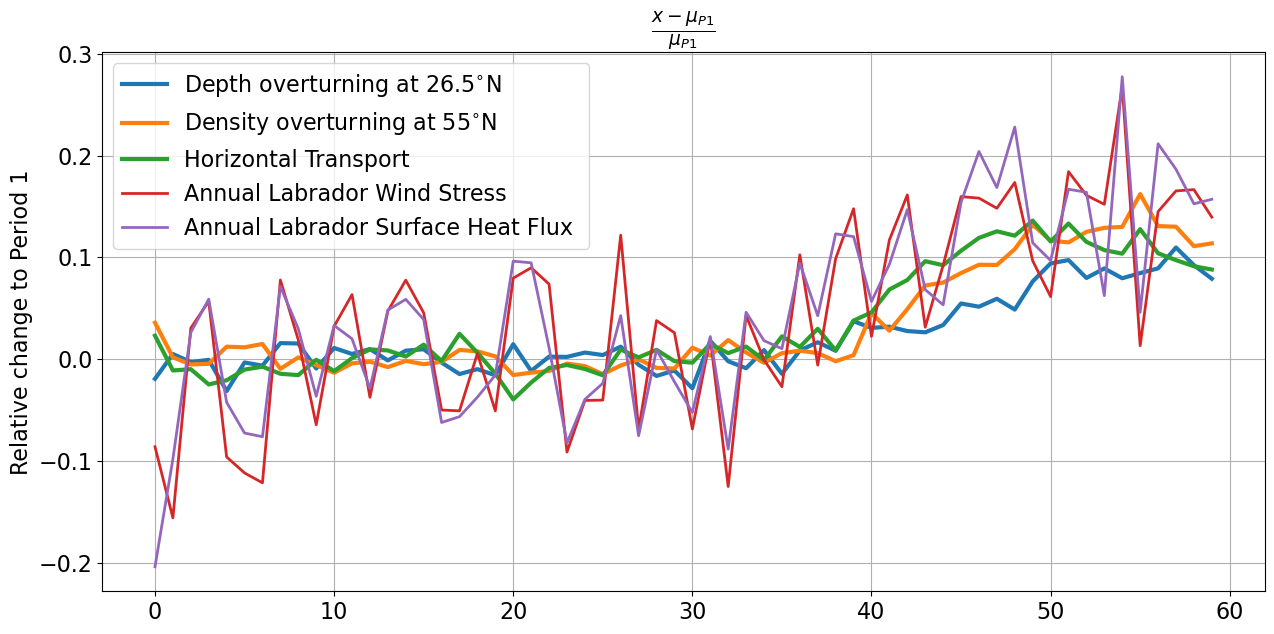

In [15]:
fig = plt.subplots(figsize=(15, 7))

colors1 = cmo.rain(np.linspace(0.1, 1, 4))
colors2 = cmo.speed(np.linspace(0.1, 0.9, 4))

plt.rc('font', size=16)

#plt.plot(delta_smoc_26N, label=r'Density overturning at 26.5$^{\circ}$N', linewidth = 3, linestyle = '--', alpha=0.5)
plt.plot(delta_dmoc_26N, label=r'Depth overturning at 26.5$^{\circ}$N', linewidth = 3)#, linestyle = '--', alpha=0.5)

#plt.plot(delta_smoc_45N, label=r'Density overturning at 45$^{\circ}$N', linewidth = 3, linestyle = '--', alpha=0.9)
#plt.plot(delta_dmoc_45N, label=r'Depth overturning at 45$^{\circ}$N', linewidth = 3, linestyle = '--', alpha=0.9)

plt.plot(delta_smoc_55N, label=r'Density overturning at 55$^{\circ}$N', linewidth = 3)
#plt.plot(delta_dmoc_55N, label=r'Depth overturning at 55$^{\circ}$N', linewidth = 3)

plt.plot(delta_bsf_min, label='Horizontal Transport', linewidth = 3)#, color = colors1[1])

plt.plot(delta_tau_lab_annual, label='Annual Labrador Wind Stress', linewidth = 2)#, color = colors2[1])
plt.plot(delta_shf_lab_mean, label='Annual Labrador Surface Heat Flux ', linewidth = 2)#, color = colors1[3])

plt.ylabel('Relative change to Period 1')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 0.85))
plt.legend()

plt.title(r'$\frac{x-\mu_{P1}}{\mu_{P1}}$')

plt.grid()
#plt.show()

plt.savefig(os.path.expanduser('~/phase1_CONDA/results/') + 'Trigger_muP1_muP1.png', bbox_inches='tight', dpi=300)

In [8]:
stdP1_delta_smoc_55N = ((ds_smoc_55N - ds_smoc_55N.isel(time=slice(0,40)).mean('time'))/(ds_smoc_55N.isel(time=slice(0,40)).std('time'))).values
stdP1_delta_dmoc_55N = ((ds_dmoc_55N - ds_dmoc_55N.isel(time=slice(0,40)).mean('time'))/(ds_dmoc_55N.isel(time=slice(0,40)).std('time'))).values
stdP1_delta_smoc_45N = ((ds_smoc_45N - ds_smoc_45N.isel(time=slice(0,40)).mean('time'))/(ds_smoc_45N.isel(time=slice(0,40)).std('time'))).values
stdP1_delta_dmoc_45N = ((ds_dmoc_45N - ds_dmoc_45N.isel(time=slice(0,40)).mean('time'))/(ds_dmoc_45N.isel(time=slice(0,40)).std('time'))).values
stdP1_delta_smoc_26N = ((ds_smoc_26N - ds_smoc_26N.isel(time=slice(0,40)).mean('time'))/(ds_smoc_26N.isel(time=slice(0,40)).std('time'))).values
stdP1_delta_dmoc_26N = ((ds_dmoc_26N - ds_dmoc_26N.isel(time=slice(0,40)).mean('time'))/(ds_dmoc_26N.isel(time=slice(0,40)).std('time'))).values
stdP1_delta_bsf_min = ((ds_bsf_min_spg  - ds_bsf_min_spg.isel(time=slice(0,40)).mean('time'))/(ds_bsf_min_spg.isel(time=slice(0,40)).std('time'))).values
stdP1_delta_tau_lab_annual = ((ds_tau_ann - ds_tau_ann.isel(time=slice(0,40)).mean('time'))/(ds_tau_ann.isel(time=slice(0,40)).std('time'))).values
stdP1_delta_tau_lab_march = ((ds_tau_mar - ds_tau_mar.isel(time=slice(0,40)).mean('time'))/(ds_tau_mar.isel(time=slice(0,40)).std('time'))).values
stdP1_delta_shf_lab_mean = ((ds_shf_lab - ds_shf_lab.isel(time=slice(0,40)).mean('time'))/(ds_shf_lab.isel(time=slice(0,40)).std('time'))).values

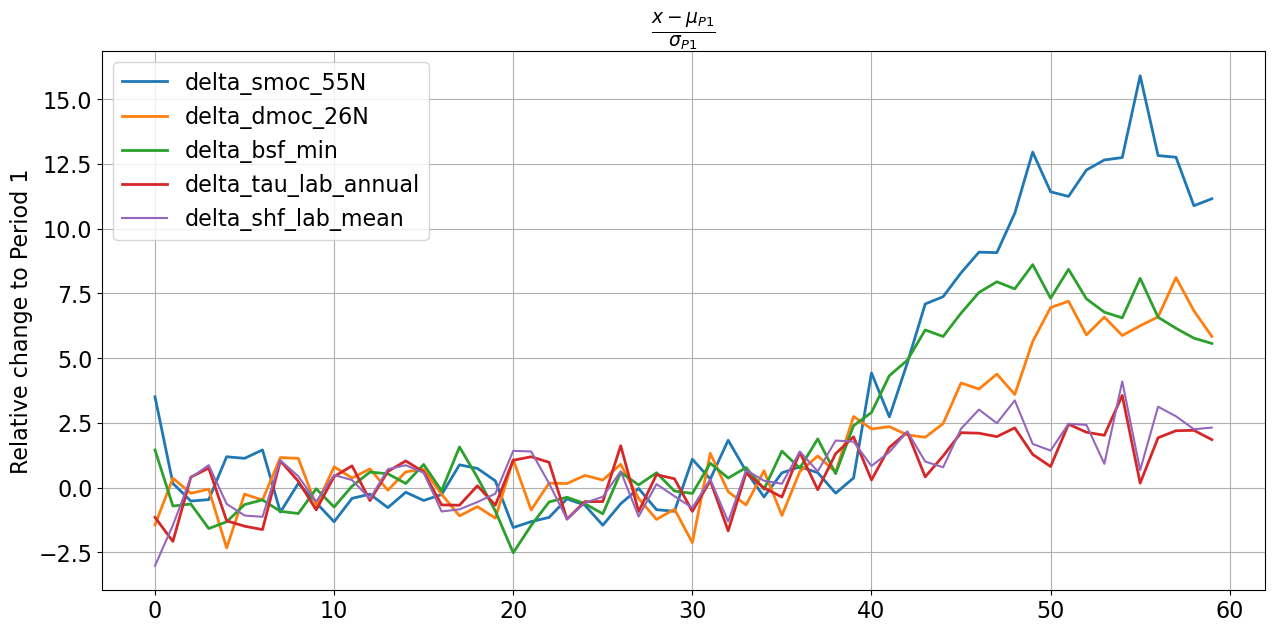

In [9]:
fig = plt.subplots(figsize=(15, 7))
plt.rc('font', size=16)
plt.plot(stdP1_delta_smoc_55N, label='delta_smoc_55N', linewidth = 2)
#plt.plot(stdP1_delta_dmoc_55N, label='delta_dmoc_55N', linewidth = 2)
#plt.plot(stdP1_delta_smoc_45N, label='delta_smoc_45N', linewidth = 2)
#plt.plot(stdP1_delta_dmoc_45N, label='delta_dmoc_45N', linewidth = 2)
#plt.plot(stdP1_delta_smoc_26N, label='delta_smoc_26N', linewidth = 2)
plt.plot(stdP1_delta_dmoc_26N, label='delta_dmoc_26N', linewidth = 2)
plt.plot(-stdP1_delta_bsf_min, label='delta_bsf_min', linewidth = 2)
plt.plot(stdP1_delta_tau_lab_annual, label='delta_tau_lab_annual', linewidth = 2)
#plt.plot(stdP1_delta_tau_lab_march, label='delta_tau_lab_march', linewidth = 2)
plt.plot(-stdP1_delta_shf_lab_mean, label='delta_shf_lab_mean')
plt.ylabel('Relative change to Period 1')
plt.legend()

plt.title(r'$\frac{x-\mu_{P1}}{\sigma_{P1}}$')

plt.grid()
plt.show()
#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'Trigger_muP1_sigmaP1.png', bbox_inches='tight')

In [10]:
std60_delta_smoc_55N = ((ds_smoc_55N - ds_smoc_55N.isel(time=slice(0,60)).mean('time'))/(ds_smoc_55N.isel(time=slice(0,60)).std('time'))).values
std60_delta_dmoc_55N = ((ds_dmoc_55N - ds_dmoc_55N.isel(time=slice(0,60)).mean('time'))/(ds_dmoc_55N.isel(time=slice(0,60)).std('time'))).values
std60_delta_smoc_45N = ((ds_smoc_45N - ds_smoc_45N.isel(time=slice(0,60)).mean('time'))/(ds_smoc_45N.isel(time=slice(0,60)).std('time'))).values
std60_delta_dmoc_45N = ((ds_dmoc_45N - ds_dmoc_45N.isel(time=slice(0,60)).mean('time'))/(ds_dmoc_45N.isel(time=slice(0,60)).std('time'))).values
std60_delta_smoc_26N = ((ds_smoc_26N - ds_smoc_26N.isel(time=slice(0,60)).mean('time'))/(ds_smoc_26N.isel(time=slice(0,60)).std('time'))).values
std60_delta_dmoc_26N = ((ds_dmoc_26N - ds_dmoc_26N.isel(time=slice(0,60)).mean('time'))/(ds_dmoc_26N.isel(time=slice(0,60)).std('time'))).values
std60_delta_bsf_min = ((ds_bsf_min_spg  - ds_bsf_min_spg.isel(time=slice(0,60)).mean('time'))/(ds_bsf_min_spg.isel(time=slice(0,60)).std('time'))).values
std60_delta_tau_lab_annual = ((ds_tau_ann - ds_tau_ann.isel(time=slice(0,60)).mean('time'))/(ds_tau_ann.isel(time=slice(0,60)).std('time'))).values
std60_delta_tau_lab_march = ((ds_tau_mar - ds_tau_mar.isel(time=slice(0,60)).mean('time'))/(ds_tau_mar.isel(time=slice(0,60)).std('time'))).values
std60_delta_shf_lab_mean = ((ds_shf_lab - ds_shf_lab.isel(time=slice(0,60)).mean('time'))/(ds_shf_lab.isel(time=slice(0,60)).std('time'))).values

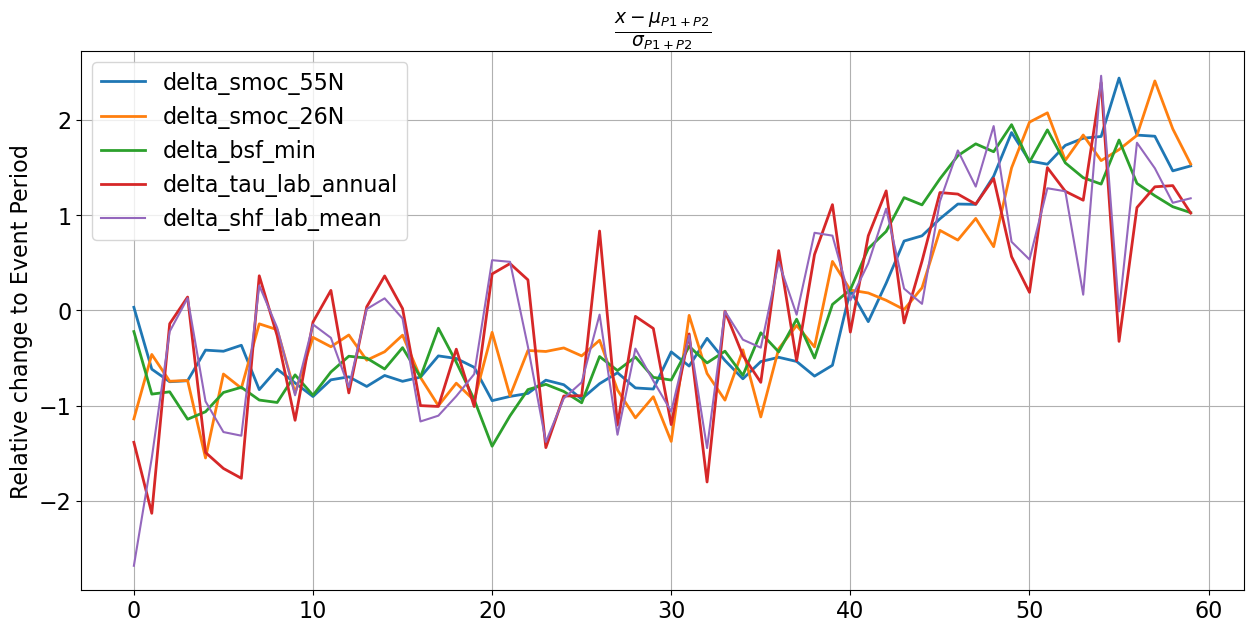

In [11]:
fig = plt.subplots(figsize=(15, 7))
plt.rc('font', size=16)
plt.plot(std60_delta_smoc_55N, label='delta_smoc_55N', linewidth = 2)
#plt.plot(std60_delta_dmoc_55N, label='delta_dmoc_55N', linewidth = 2)
#plt.plot(std60_delta_smoc_45N, label='delta_smoc_45N', linewidth = 2)
#plt.plot(std60_delta_dmoc_45N, label='delta_dmoc_45N', linewidth = 2)
plt.plot(std60_delta_smoc_26N, label='delta_smoc_26N', linewidth = 2)
#plt.plot(std60_delta_dmoc_26N, label='delta_dmoc_26N', linewidth = 2)
plt.plot(-std60_delta_bsf_min, label='delta_bsf_min', linewidth = 2)
plt.plot(std60_delta_tau_lab_annual, label='delta_tau_lab_annual', linewidth = 2)
#plt.plot(std60_delta_tau_lab_march, label='delta_tau_lab_march', linewidth = 2)
plt.plot(-std60_delta_shf_lab_mean, label='delta_shf_lab_mean')
plt.ylabel('Relative change to Event Period')
plt.legend(loc='upper left')

plt.title(r'$\frac{x-\mu_{P1+P2}}{\sigma_{P1+P2}}$')

plt.grid()
plt.show()
#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'Trigger_muP1P2_sigmaP1P2.png', bbox_inches='tight')

In [12]:
mean60_delta_smoc_55N = ((ds_smoc_55N - ds_smoc_55N.isel(time=slice(0,60)).mean('time'))/(ds_smoc_55N.isel(time=slice(0,60)).mean('time'))).values
mean60_delta_dmoc_55N = ((ds_dmoc_55N - ds_dmoc_55N.isel(time=slice(0,60)).mean('time'))/(ds_dmoc_55N.isel(time=slice(0,60)).mean('time'))).values
mean60_delta_smoc_45N = ((ds_smoc_45N - ds_smoc_45N.isel(time=slice(0,60)).mean('time'))/(ds_smoc_45N.isel(time=slice(0,60)).mean('time'))).values
mean60_delta_dmoc_45N = ((ds_dmoc_45N - ds_dmoc_45N.isel(time=slice(0,60)).mean('time'))/(ds_dmoc_45N.isel(time=slice(0,60)).mean('time'))).values
mean60_delta_smoc_26N = ((ds_smoc_26N - ds_smoc_26N.isel(time=slice(0,60)).mean('time'))/(ds_smoc_26N.isel(time=slice(0,60)).mean('time'))).values
mean60_delta_dmoc_26N = ((ds_dmoc_26N - ds_dmoc_26N.isel(time=slice(0,60)).mean('time'))/(ds_dmoc_26N.isel(time=slice(0,60)).mean('time'))).values
mean60_delta_bsf_min = ((ds_bsf_min_spg  - ds_bsf_min_spg.isel(time=slice(0,60)).mean('time'))/(ds_bsf_min_spg.isel(time=slice(0,60)).mean('time'))).values
mean60_delta_tau_lab_annual = ((ds_tau_ann - ds_tau_ann.isel(time=slice(0,60)).mean('time'))/(ds_tau_ann.isel(time=slice(0,60)).mean('time'))).values
mean60_delta_tau_lab_march = ((ds_tau_mar - ds_tau_mar.isel(time=slice(0,60)).mean('time'))/(ds_tau_mar.isel(time=slice(0,60)).mean('time'))).values
mean60_delta_shf_lab_mean = ((ds_shf_lab - ds_shf_lab.isel(time=slice(0,60)).mean('time'))/(ds_shf_lab.isel(time=slice(0,60)).mean('time'))).values

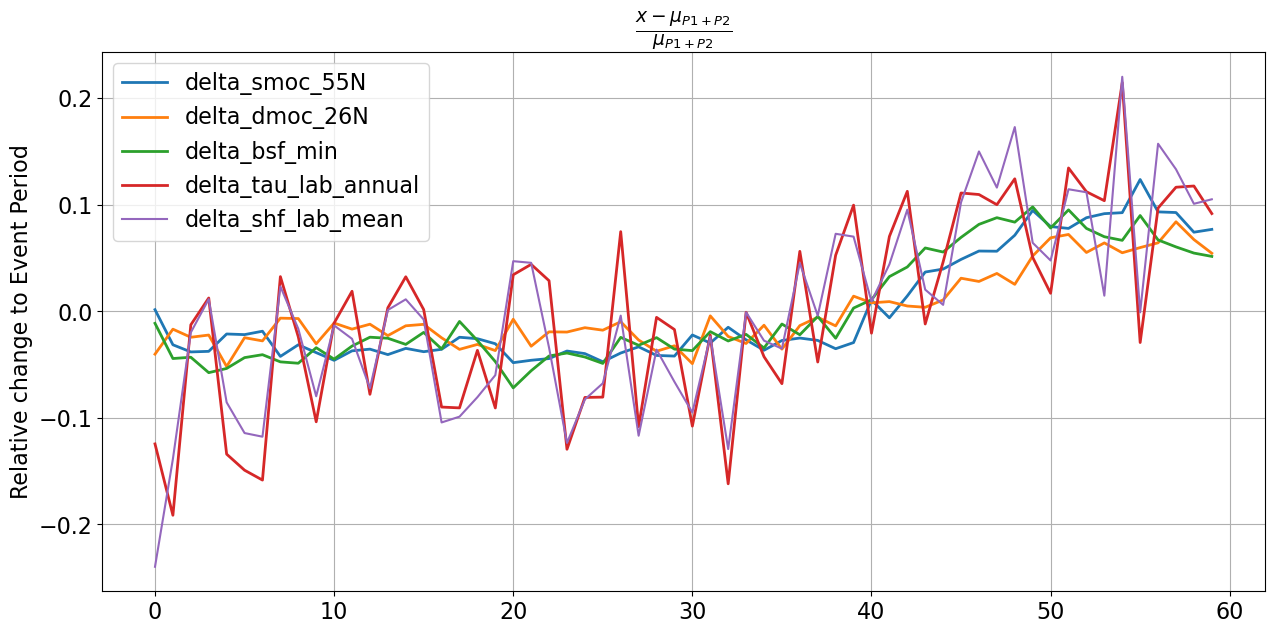

In [13]:
fig = plt.subplots(figsize=(15, 7))
plt.rc('font', size=16)
plt.plot(mean60_delta_smoc_55N, label='delta_smoc_55N', linewidth = 2)
#plt.plot(mean60_delta_dmoc_55N, label='delta_dmoc_55N', linewidth = 2)
#plt.plot(mean60_delta_smoc_45N, label='delta_smoc_45N', linewidth = 2)
#plt.plot(mean60_delta_dmoc_45N, label='delta_dmoc_45N', linewidth = 2)
#plt.plot(mean60_delta_smoc_26N, label='delta_smoc_26N', linewidth = 2)
plt.plot(mean60_delta_dmoc_26N, label='delta_dmoc_26N', linewidth = 2)
plt.plot(mean60_delta_bsf_min, label='delta_bsf_min', linewidth = 2)
plt.plot(mean60_delta_tau_lab_annual, label='delta_tau_lab_annual', linewidth = 2)
#plt.plot(mean60_delta_tau_lab_march, label='delta_tau_lab_march', linewidth = 2)
plt.plot(mean60_delta_shf_lab_mean, label='delta_shf_lab_mean')
plt.ylabel('Relative change to Event Period')
plt.legend(loc='upper left')

plt.title(r'$\frac{x-\mu_{P1+P2}}{\mu_{P1+P2}}$')

plt.grid()
#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'Trigger_muP1P2_muP1P2.png', bbox_inches='tight')